## Name: Deepak Prajapat

Data Science Intern

Task 4: Prediction using Decision Tree  Algorithm

In [ ]:
# Create the Decision Tree classifier and visualize it graphically. 
# The purpose is if we feed any new data to this classifier, 
# it would be able to  predict the right class accordingly

## Import The Necessary Libraries

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

### Read Dataset

In [2]:
df= pd.read_csv('Iris.csv')

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Analyse Dataset

In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Preprocessing & Encoding Features

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

In [7]:
LE= LabelEncoder()

In [8]:
df.iloc[:,-1] = LE.fit_transform(df.iloc[:,-1])

C:\Users\deepak parajapt\AppData\Local\Temp\ipykernel_19028\1605882770.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,-1] = LE.fit_transform(df.iloc[:,-1])


In [9]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


### Assigning of Feature

In [10]:
X = df.iloc[:,:-1]
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [11]:
y = df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

### Training & Testing

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=50)

In [14]:
X_train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
125,126,7.2,3.2,6.0,1.8
98,99,5.1,2.5,3.0,1.1
73,74,6.1,2.8,4.7,1.2
144,145,6.7,3.3,5.7,2.5
21,22,5.1,3.7,1.5,0.4


In [15]:
X_train.shape,y_train.shape

((120, 5), (120,))

### Model Building

In [16]:
  from sklearn.tree import DecisionTreeClassifier

In [17]:
dtc = DecisionTreeClassifier()

In [18]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
y_pred = dtc.predict(X_test)

In [20]:
y_pred 

array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 2, 1, 2, 1, 1, 1, 2])

In [22]:
y_test = np.array(y_test)
y_test

array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 1, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2])

### Accuracy

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y_pred,y_test)

0.9666666666666667

### Clssification of Model

In [25]:
from sklearn.metrics import classification_report

In [28]:
cls = classification_report(y_pred,y_test)

In [29]:
print(cls)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        13
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### Display Decision Tree

In [30]:
from sklearn import tree

[Text(0.4, 0.8333333333333334, 'PetalWidthCm <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [41, 38, 41]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.6, 0.5, 'Id <= 101.0\ngini = 0.499\nsamples = 79\nvalue = [0, 38, 41]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 41\nvalue = [0, 0, 41]')]

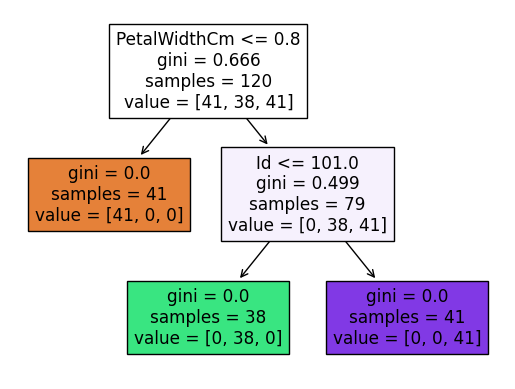

In [41]:
tree.plot_tree(dtc, filled=True,feature_names=X.columns)

In [ ]:
#Thank you!